In [ ]:
#Covid-19 데이터 분석
import pandas as pd


#Task 1. csv 파일 다운로드 & pandas 이용하여 불러오기

filename = './owid-covid-data.csv'
data = pd.read_csv(filename)
#'data'열의 데이터 날짜 타입으로 변경하기 to_datatime 활용
data['date'] = pd.to_datetime(data['date'])
#결측치 미리 제거
df = data[['location','total_deaths_per_million','total_cases_per_million','human_development_index','people_vaccinated_per_hundred']].dropna()

#data 형태 확인
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


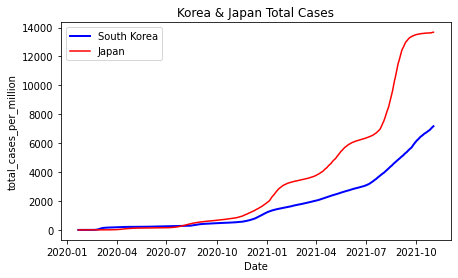

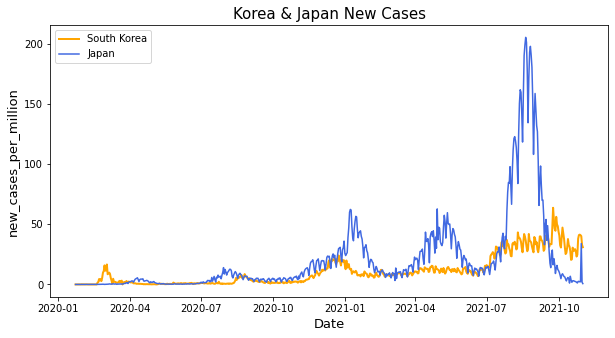

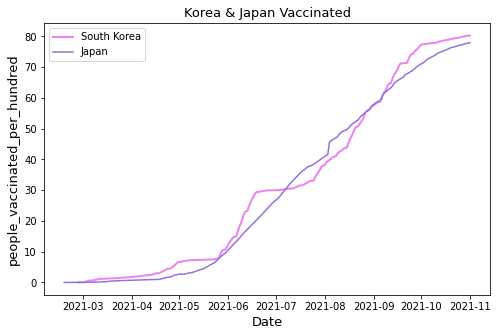

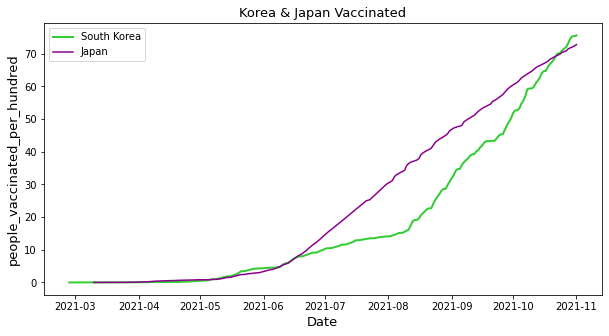

In [ ]:
#Task 2. 한국과 일본의 코로나 상황 비교 시각화
#location으로 찾기
import matplotlib.pyplot as plt



#날짜별 확진자 비율(total_cases_per_million)
#결측치 제거
total = data.dropna(subset=['total_cases_per_million'],axis=0)
#한국에 해당하는 data
l = total['location']
k = total[l == 'South Korea']
j = total[l == 'Japan']

#시각화
fig1 = plt.figure(figsize=(7,4))
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(k['date'], k['total_cases_per_million'], label='South Korea', color = 'b' ,linewidth=2)
ax1.plot(j['date'], j['total_cases_per_million'], label='Japan', color = 'r')

ax1.set_ylabel('total_cases_per_million')
ax1.set_xlabel('Date')
ax1.set_title('Korea & Japan Total Cases')
ax1.legend(loc='best')
plt.show()


#날짜별 신규 확인자 비율(new_cases_per_million)


#시각화
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(1,1,1)

ax2.plot(k['date'], k['new_cases_per_million'], label='South Korea', color = 'orange' ,linewidth=2)
ax2.plot(j['date'], j['new_cases_per_million'], label='Japan', color = 'royalblue')

ax2.set_ylabel('new_cases_per_million',fontsize=13)
ax2.set_xlabel('Date',fontsize=13)
ax2.set_title('Korea & Japan New Cases',fontsize=15)
ax2.legend(loc='best')


#날짜별 백신 접종자 비율 (people_vaccinated_per_hundred)
#결측치 제거
va = data.dropna(subset=['people_vaccinated_per_hundred'],axis=0)
l = va['location']
k = va[l == 'South Korea']
j = va[l == 'Japan']

#시각화
fig3 = plt.figure(figsize=(8,5))
ax3 = fig3.add_subplot(1,1,1)

ax3.plot(k['date'], k['people_vaccinated_per_hundred'], label='South Korea', color = 'violet' ,linewidth=2)
ax3.plot(j['date'], j['people_vaccinated_per_hundred'], label='Japan', color = 'mediumpurple')

ax3.set_ylabel('people_vaccinated_per_hundred',fontsize=13)
ax3.set_xlabel('Date',fontsize=13)
ax3.set_title('Korea & Japan Vaccinated',fontsize=13)
ax3.legend(loc='best')
plt.show()

#날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred)
fv = data.dropna(subset=['people_fully_vaccinated_per_hundred'],axis=0)
l = fv['location']
k = fv[l == 'South Korea']
j = fv[l == 'Japan']

#시각화
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(1,1,1)

ax4.plot(k['date'], k['people_fully_vaccinated_per_hundred'], label='South Korea', color = 'limegreen' ,linewidth=2)
ax4.plot(j['date'], j['people_fully_vaccinated_per_hundred'], label='Japan', color = 'darkmagenta')

ax4.set_ylabel('people_vaccinated_per_hundred',fontsize=13)
ax4.set_xlabel('Date',fontsize=13)
ax4.set_title('Korea & Japan Vaccinated',fontsize=13)
ax4.legend(loc='best')
plt.show()


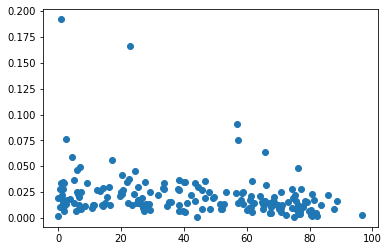

Pearson Correlation Coefficient: -0.25168758460015506


In [ ]:
#Task3. 백신 접종률 확진자 비율 대비 사망자 비율 사이의 상관관계 알아보기

#3-1 새로운 데이터프레임 생성
new_df = pd.DataFrame(data,columns=['location','date','total_deaths_per_million','total_cases_per_million','people_vaccinated_per_hundred','human_development_index'])
new_df

#3-2 각 국가별로 가장 최근 날짜의 데이터 추출하기

#이 방법으로 해도 같은 결과
#수정 사항: data -> df(결측치 제거한 데이터)로 바꿔줌-> 피어슨 얼추 맞음
grouped = df.groupby(['location'])
m = grouped.max(['date'])
# m = grouped.max(['date'])
m



v  = m['people_vaccinated_per_hundred']
death_cases = m['total_deaths_per_million'] / m['total_cases_per_million']

#3-3 백신 접종률 x축, 확진자 비율 대비 사망자 비율 y축으로 하는 scatter plot 그리기
#3-2에서 얻은 data로 하기
plt.scatter(v, death_cases)
plt.xticks([0,20,40,60,80,100])
plt.yticks([0.000,0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200])
plt.show()


#백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수(Pearson Correlation Coefficient) 구하기 (함수 직접 구현)
#수정사항: 위에서 결측치 제거한 df로 함
#백신 접종률
X = []
#확진자 비율 대비 사망자 비율
Y = []


#data 추출해서 list에 넣기
for i in range(len(death_cases)):
 X.append(v.iloc[i])
 Y.append(death_cases.iloc[i])


def corr(X,Y):

  #평균
  mean_x = sum(X)/len(X)
  mean_y = sum(Y)/len(Y)

  #분산
  std_x = (sum((x - mean_x) ** 2 for x in X)/len(X)) ** 0.5
  std_y = (sum((y - mean_y) ** 2 for y in Y)/len(Y)) ** 0.5

  #공분산
  cov = sum((x - mean_x) * (y - mean_y) for x, y in zip(X,Y))/len(X)

  #상관 계수
  corr = cov/std_x/std_y

  return corr

print("Pearson Correlation Coefficient:",corr(X,Y))

Pearson Correlation Coefficient: 0.8223528627985829
epoch: 7000, cost: 244.617661, W: 149.56175231933594, b: tensor([[-66.2838]])


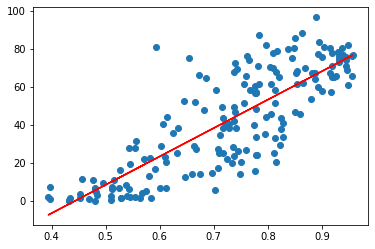

In [ ]:
#Task 4.(백신 접종은 전세계적으로 골고루 이뤄지고 있을까?) HDI 계수(human_development_index)와 백신 접종률(people_vaccinated_per_hundred) 사이의 상관관계 알아보기 (Task 3-1 에서 구한 데이터프레임 활용)
import torch
import numpy as np
# Task 3-2에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (Task 3-4에서 구현한 함수 사용 혹은 기타 다른 방법 활용 가능)
h = m['human_development_index']

#hdi 계수
H = []
#백신 접종률
V = []


#hdi matrix
h_m = []
#vac matrix
v_m = []
#H & V에 data 넣기
for i in range(len(h)):
 H.append(h.iloc[i])
 V.append(v.iloc[i])
 h_m.append([h.iloc[i]])
 v_m.append([v.iloc[i]])

#상관 계수
print("Pearson Correlation Coefficient:",corr(H,V))

# Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)

hdi = torch.FloatTensor(h_m)
vac = torch.FloatTensor(v_m)


W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 0.095
lr2 = 0.01

for epoch in range(7001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  #가설함수 설정
  hypothesis = torch.mm(hdi,W) + b
  #cost 설정
  cost = torch.mean((hypothesis - vac) ** 2)
  
  #경사 계산
  cost.backward()
  
  #경사 업데이트
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr2 * b.grad

print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}'.format(epoch, cost.item(), W.squeeze(), b))


# HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서 학습한 직선을 겹쳐 그리기 (scatter plot과 직선이 일치하는지 확인하여 학습이 제대로 되었는지 확인)
hypo = torch.squeeze(hypothesis)
a = m['human_development_index']
b = m['people_vaccinated_per_hundred']
plt.scatter(a,b)
plt.plot(hdi,hypo.detach().numpy(), c='red')